# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [118]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [119]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [120]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
      
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-gentil
Processing Record 2 of Set 1 | bilma
Processing Record 3 of Set 1 | henties bay
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | karoi
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | kurkino
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | mahebourg
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 14 of Set 1 | bathsheba
Processing Record 15 of Set 1 | igarka
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | spornoye
Processing Record 18 of Set 1 | san ramon de la nueva oran
Processing Record 19 of Set 1 | maldonado
Processing Record 20 of Set 1 | havre-saint-pierre
Processing Record 21 of Set 1 | torbay
Processing Record 22 of Set 1 

In [121]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [122]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-gentil,-0.7193,8.7815,26.93,77,100,3.48,GA,1674362596
1,bilma,18.6853,12.9164,16.26,17,0,2.83,NE,1674362685
2,henties bay,-22.1160,14.2845,18.12,89,78,1.81,NA,1674362686
3,mataura,-46.1927,168.8643,14.15,89,84,3.24,NZ,1674362686
4,karoi,-16.8099,29.6925,16.94,98,100,1.14,ZW,1674362686


In [123]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [124]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-gentil,-0.7193,8.7815,26.93,77,100,3.48,GA,1674362596
1,bilma,18.6853,12.9164,16.26,17,0,2.83,NE,1674362685
2,henties bay,-22.1160,14.2845,18.12,89,78,1.81,NaN,1674362686
3,mataura,-46.1927,168.8643,14.15,89,84,3.24,NZ,1674362686
4,karoi,-16.8099,29.6925,16.94,98,100,1.14,ZW,1674362686


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

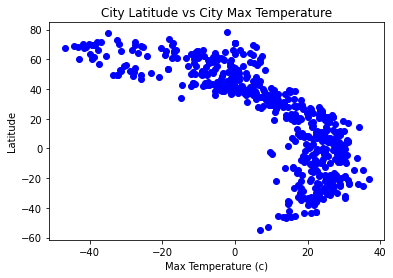

In [125]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Max Temp'],city_data_df['Lat'], marker="o", facecolors="blue"),

# Incorporate the other graph properties
plt.title('City Latitude vs City Max Temperature')
plt.xlabel('Max Temperature (c)')
plt.ylabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig1.png")


#### Latitude Vs. Humidity

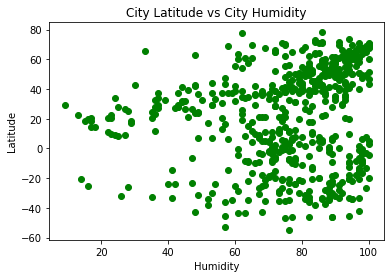

In [126]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Humidity'],city_data_df['Lat'], marker="o", facecolors="green"),

# Incorporate the other graph properties
plt.title('City Latitude vs City Humidity')
plt.xlabel('Humidity')
plt.ylabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig2.png")


#### Latitude Vs. Cloudiness

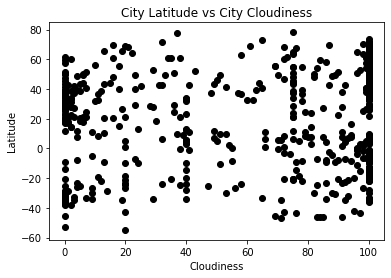

In [127]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Cloudiness'],city_data_df['Lat'], marker="o", facecolors="k"),

# Incorporate the other graph properties
plt.title('City Latitude vs City Cloudiness')
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig3.png")


#### Latitude vs. Wind Speed Plot

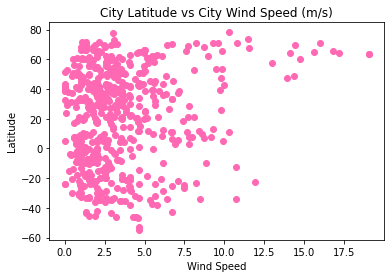

In [128]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Wind Speed'],city_data_df['Lat'], marker="o", facecolors="hotpink"),

# Incorporate the other graph properties
plt.title('City Latitude vs City Wind Speed (m/s)')
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig4.png")


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [129]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x, y, xlabel, ylabel, pointcolor='blue', linecolor='red'):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    plt.scatter(x, y, color=pointcolor)
    plt.plot(x, intercept + slope*x, linecolor)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title("The R-value is: {}".format(r_value), loc= 'left')
    plt.text(0.95, 0.05, 'y = {:.2f}x + {:.2f}'.format(slope, intercept), transform=plt.gca().transAxes, ha='right', fontsize=10, color=linecolor);

In [130]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
#northern_hemi_df = pd.DataFrame(city_data_df)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bilma,18.6853,12.9164,16.26,17,0,2.83,NE,1674362685
7,kurkino,53.4257,38.6582,-5.64,91,100,3.51,RU,1674362687
8,albany,42.6001,-73.9662,-0.46,80,92,1.04,US,1674362687
10,hilo,19.7297,-155.0900,24.60,79,0,3.60,US,1674362688
12,bathsheba,13.2167,-59.5167,25.34,73,40,9.26,BB,1674362688


In [131]:
#show how many cities are in the northern hemisphere
northern_hemi_df.count()

City          389
Lat           389
Lng           389
Max Temp      389
Humidity      389
Cloudiness    389
Wind Speed    389
Country       389
Date          389
dtype: int64

In [132]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-gentil,-0.7193,8.7815,26.93,77,100,3.48,GA,1674362596
2,henties bay,-22.1160,14.2845,18.12,89,78,1.81,NaN,1674362686
3,mataura,-46.1927,168.8643,14.15,89,84,3.24,NZ,1674362686
4,karoi,-16.8099,29.6925,16.94,98,100,1.14,ZW,1674362686
5,port alfred,-33.5906,26.8910,21.21,97,100,1.34,ZA,1674362686


In [133]:
#show how many cities are in the southern hemisphere
southern_hemi_df.count()

City          169
Lat           169
Lng           169
Max Temp      169
Humidity      169
Cloudiness    169
Wind Speed    169
Country       166
Date          169
dtype: int64

###  Temperature vs. Latitude Linear Regression Plot

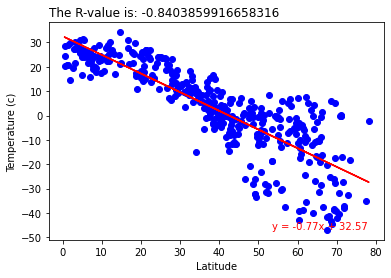

In [134]:
# Northern Hemisphere
#def linear_regression_plot(x, y, xlabel, ylabel, pointcolor='blue', linecolor='red'):
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Temperature (c)', pointcolor='blue', linecolor='red')


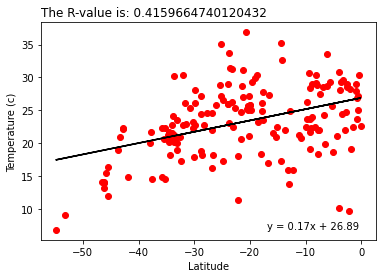

In [135]:
# Southern Hemisphere
#def linear_regression_plot(x, y, xlabel, ylabel, pointcolor='red', linecolor='black'):
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Temperature (c)', pointcolor='red', linecolor='black')


**Discussion about the linear relationship:** 

Latitude in the Northern Hemisphere has a greater spread across the temperature axis than the Southern Hemisphere. This could be due to there being more locations within the Nothern Hemisphere. The Chart also shows a greater range of temperature in the Northern Hemisphere compared to the Southern Hemisphere. With a much cooler Max Temperature than in the Southern Hemisphere.

The Northern Hemisphere linear regession line indicates that there is a stronger correlation between the independent variable and the dependent variable than is shown in the Southern Hemisphere and that the linear regression line is a beter model for the data than the Southern Hemisphere line.

### Humidity vs. Latitude Linear Regression Plot

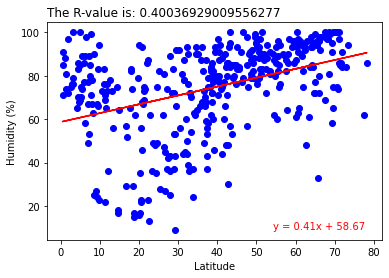

In [136]:
# Northern Hemisphere
#def linear_regression_plot(x, y, xlabel, ylabel, pointcolor='blue', linecolor='red'):
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity (%)', pointcolor='blue', linecolor='red')


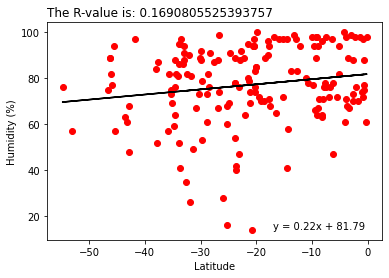

In [137]:
# Southern Hemisphere
#def linear_regression_plot(x, y, xlabel, ylabel, pointcolor='red', linecolor='black'):
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity (%)', pointcolor='red', linecolor='black')

**Discussion about the linear relationship:** 

Once again Latitude in the Northern Hemisphere has a greater spread across the humidity axis than the Southern Hemisphere. The Northern Hemisphere appears to have a larger cluster of points for the Humidity further away from the equator (0), where as the Southern Hemisphere shows higher Humidity point clusters as it gets closer to the equator.

Both the Northern & Southern Hemisphere linear regession lines are similar, however the Northern Hemisphere shows a steeper positive incline.

### Cloudiness vs. Latitude Linear Regression Plot

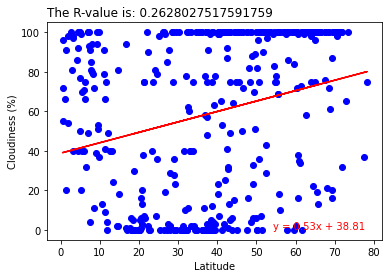

In [138]:
# Northern Hemisphere
#def linear_regression_plot(x, y, xlabel, ylabel, pointcolor='blue', linecolor='red'):
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness (%)', pointcolor='blue', linecolor='red')

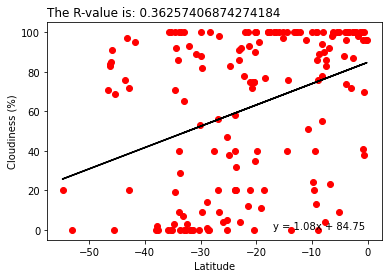

In [139]:
# Southern Hemisphere
#def linear_regression_plot(x, y, xlabel, ylabel, pointcolor='red', linecolor='black'):
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness (%)', pointcolor='red', linecolor='black')

**Discussion about the linear relationship:** 

Both the Northern & Southern Hemisphere linear regession lines indicate that there is a weak correlation between the independent variable and the dependent variable with both charts having a relatively even 'scattered' appearance of plot points across the chart

### Wind Speed vs. Latitude Linear Regression Plot

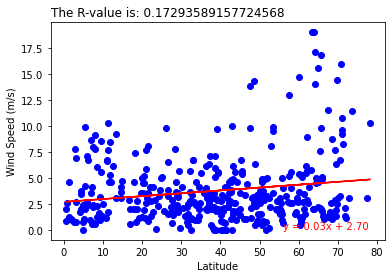

In [140]:
# Northern Hemisphere
#def linear_regression_plot(x, y, xlabel, ylabel, pointcolor='blue', linecolor='red'):
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed (m/s)', pointcolor='blue', linecolor='red')

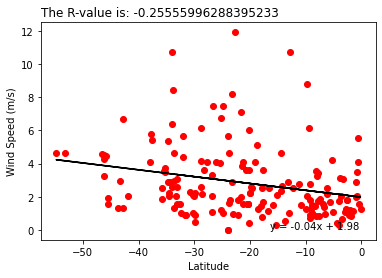

In [141]:
# Southern Hemisphere
#def linear_regression_plot(x, y, xlabel, ylabel, pointcolor='red', linecolor='black'):
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed (m/s)', pointcolor='red', linecolor='black')

**Discussion about the linear relationship:** 

Overall Wind Speed shows to be lower in the Northern Hemsphere regardless of Latitude compared to the Southern Hemisphere.

The Northern Hemisphere has a positive slope meaning that as the independent value (latitude) increases, so does the dependant value(Wind Speed).
The Southern Hemisphere has a negative slope meaning that as the independent value (latitude) increases, the dependant value(Wind Speed) decreases.